In [1]:
!pip install kaggle

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# *1. Importing the dataset from Kaggle*

In [3]:
!kaggle datasets download -d kenjee/z-by-hp-unlocked-challenge-3-signal-processing

100% 603M/604M [00:28<00:00, 23.3MB/s]
100% 604M/604M [00:28<00:00, 22.4MB/s]


In [4]:
# extracting the compessed dataset
from zipfile import ZipFile
dataset = '/content/z-by-hp-unlocked-challenge-3-signal-processing.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [5]:
!ls

'Forest Recordings'	     Parsed_Not_Capuchinbird_Clips
 kaggle.json		     sample_data
 Parsed_Capuchinbird_Clips   z-by-hp-unlocked-challenge-3-signal-processing.zip


# *1.2 Importing the Dependencies*

In [6]:
!pip install tensorflow-io

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 28.8/28.8 MB 31.8 MB/s eta 0:00:00


In [7]:
import os
from matplotlib import pyplot as plt
import tensorflow as tf
import tensorflow_io as tfio

# *2.Build data loading function*

### *2.1 Defining paths to files*

In [8]:
CAPUCHIN_FILE = os.path.join('data', '/content/Parsed_Capuchinbird_Clips', 'XC216012-13.wav')
NOT_CAPUCHIN_FILE = os.path.join('data', '/content/Parsed_Not_Capuchinbird_Clips', 'Crickets-chirping-9.wav')
CAPUCHIN_FILE

'/content/Parsed_Capuchinbird_Clips/XC216012-13.wav'

In [9]:
NOT_CAPUCHIN_FILE

'/content/Parsed_Not_Capuchinbird_Clips/Crickets-chirping-9.wav'

### *2.2 Building dataloading funnction*

In [10]:
def load_wav_16k_momo(filename):
  # laod encoded wav file
  file_contents = tf.io.read_file(filename)
  # decode wav (tensors by channels)
  wav, sample_rate = tf.audio.decode_wav(file_contents, desired_channels=1)
  # remove traling axis
  wav = tf.squeeze(wav, axis=-1)
  sample_rate = tf.cast(sample_rate, dtype=tf.int64)
  # goes from 44100Hz to 16000Hz - ampltude of the audio signal
  wav = tfio.audio.resample(wav, rate_in=sample_rate, rate_out=16000)
  return wav

### *2.3 Plot wave*



In [11]:
wave = load_wav_16k_momo(CAPUCHIN_FILE)
nwave = load_wav_16k_momo(NOT_CAPUCHIN_FILE)

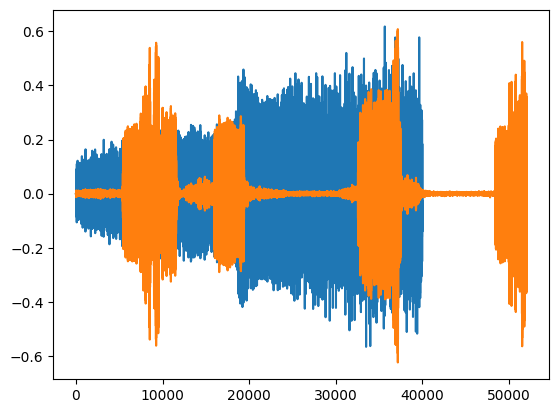

In [12]:
plt.plot(wave)
plt.plot(nwave)
plt.show()

# *3. Create Tensorflow dataset*


### *3.1 Define paths to positive and negative data*

In [13]:
POS = os.path.join( '/content/Parsed_Capuchinbird_Clips')
NEG = os.path.join( '/content/Parsed_Not_Capuchinbird_Clips')

In [14]:
POS

'/content/Parsed_Capuchinbird_Clips'

In [15]:
NEG

'/content/Parsed_Not_Capuchinbird_Clips'



### *3.2 Create tensorflow datasets*

In [16]:
pos = tf.data.Dataset.list_files(POS+'/*.wav')
neg = tf.data.Dataset.list_files(NEG+'/*.wav')

In [17]:
pos.as_numpy_iterator().next()

b'/content/Parsed_Capuchinbird_Clips/XC227471-2.wav'

### *3.3 Add labels and combine positive and negative sample*

In [18]:
positives = tf.data.Dataset.zip((pos, tf.data.Dataset.from_tensor_slices(tf.ones(len(pos)))))
negatives = tf.data.Dataset.zip((neg, tf.data.Dataset.from_tensor_slices(tf.zeros(len(neg)))))
data = positives.concatenate(negatives)

In [19]:
positives.as_numpy_iterator().next()

(b'/content/Parsed_Capuchinbird_Clips/XC395129-2.wav', 1.0)

In [20]:
negatives.as_numpy_iterator().next()

(b'/content/Parsed_Not_Capuchinbird_Clips/rain-thunder-and-crickets-sound-effect-8.wav',
 0.0)

In [21]:
data.as_numpy_iterator().next()

(b'/content/Parsed_Capuchinbird_Clips/XC495697-3.wav', 1.0)

In [22]:
data.shuffle(100).as_numpy_iterator().next()

(b'/content/Parsed_Capuchinbird_Clips/XC387509-4.wav', 1.0)

# *4. Detremine average length of capuchin call*

### *4.1 Calculate wave cycle length*

In [23]:
# lenghts = []
# for file in os.listdir(os.path.join('data', '/content/Parsed_Capuchinbird_Clips')):
  # tensor_wave = load_wav_16k_momo(os.path.join('data', '/content/Parsed_Capuchinbird_Clips'))
  # lengths.append(len(tensor_wave))

from pathlib import Path

lengths = []
dir_path = '/content/Parsed_Capuchinbird_Clips'
for file in os.listdir(dir_path):
    file_path = os.path.join(dir_path, file)
    if os.path.isfile(file_path):
        print(f"Processing file: {file_path}")
        tensor_wave = load_wav_16k_momo(file_path)
        print(f"Tensor shape: {tensor_wave.shape}")
        lengths.append(len(tensor_wave))


Processing file: /content/Parsed_Capuchinbird_Clips/XC168899-0.wav
Tensor shape: (64000,)
Processing file: /content/Parsed_Capuchinbird_Clips/XC216012-20.wav
Tensor shape: (48000,)
Processing file: /content/Parsed_Capuchinbird_Clips/XC227468-2.wav


Tensor shape: (64000,)
Processing file: /content/Parsed_Capuchinbird_Clips/XC46241-1.wav
Tensor shape: (56000,)
Processing file: /content/Parsed_Capuchinbird_Clips/XC227469-0.wav
Tensor shape: (48000,)
Processing file: /content/Parsed_Capuchinbird_Clips/XC395129-1.wav
Tensor shape: (32000,)
Processing file: /content/Parsed_Capuchinbird_Clips/XC513083-0.wav
Tensor shape: (48000,)
Processing file: /content/Parsed_Capuchinbird_Clips/XC433953-1.wav
Tensor shape: (48000,)
Processing file: /content/Parsed_Capuchinbird_Clips/XC16803-0.wav
Tensor shape: (56000,)
Processing file: /content/Parsed_Capuchinbird_Clips/XC65196-1.wav
Tensor shape: (56000,)
Processing file: /content/Parsed_Capuchinbird_Clips/XC22397-0.wav
Tensor shape: (64000,)
Processing file: /content/Parsed_Capuchinbird_Clips/XC395129-5.wav
Tensor shape: (48000,)
Processing file: /content/Parsed_Capuchinbird_Clips/XC307385-4.wav
Tensor shape: (64000,)
Processing file: /content/Parsed_Capuchinbird_Clips/XC65196-2.wav
Tensor shape: (

In [24]:
lengths

[64000,
 48000,
 64000,
 56000,
 48000,
 32000,
 48000,
 48000,
 56000,
 56000,
 64000,
 48000,
 64000,
 56000,
 48000,
 48000,
 72000,
 48000,
 48000,
 48000,
 48000,
 48000,
 40000,
 56000,
 56000,
 64000,
 56000,
 56000,
 56000,
 56000,
 56000,
 64000,
 56000,
 56000,
 48000,
 40000,
 56000,
 48000,
 48000,
 56000,
 48000,
 64000,
 56000,
 64000,
 64000,
 48000,
 64000,
 64000,
 64000,
 64000,
 56000,
 64000,
 64000,
 48000,
 55999,
 56000,
 56000,
 48000,
 56000,
 56000,
 48000,
 48000,
 56000,
 56000,
 56000,
 64000,
 56000,
 40000,
 64000,
 64000,
 56000,
 56000,
 56000,
 56000,
 56000,
 48000,
 64000,
 56000,
 56000,
 40000,
 40000,
 56000,
 72000,
 64000,
 56000,
 56000,
 56000,
 56000,
 56000,
 40000,
 48000,
 48000,
 64000,
 56000,
 48000,
 48000,
 55999,
 64000,
 64000,
 56000,
 48000,
 39999,
 48000,
 48000,
 56000,
 56000,
 64000,
 48000,
 56000,
 48000,
 64000,
 56000,
 56000,
 48000,
 56000,
 48000,
 48000,
 56000,
 48000,
 40000,
 48000,
 48000,
 32000,
 64000,
 56000,


### *4.2 Calculate Mean, Min and Max*

In [25]:
tf.math.reduce_mean(lengths)

<tf.Tensor: shape=(), dtype=int32, numpy=54156>

In [26]:
tf.math.reduce_min(lengths)

<tf.Tensor: shape=(), dtype=int32, numpy=32000>

In [27]:
tf.math.reduce_max(lengths)

<tf.Tensor: shape=(), dtype=int32, numpy=80000>

# *5 Build preprocessing function to convert to spectrogram*

### *5.1 Build preprocessing function*

In [28]:
def preprocess(file_path, label):
  wav = load_wav_16k_momo(file_path)
  wav = wav[:48000]
  zero_padding = tf.zeros([48000] - tf.shape(wav), dtype=tf.float32)
  wav = tf.concat([zero_padding, wav], 0)
  spectrogram = tf.signal.stft(wav, frame_length=320, frame_step=32)
  spectrogram = tf.abs(spectrogram)
  spectrogram = tf.expand_dims(spectrogram, axis=2)
  return spectrogram, label

### *5.2 test out the function and viz the spectogram*

In [29]:
filepath, label = positives.shuffle(buffer_size=10000).as_numpy_iterator().next()

In [30]:
spectrogram, label = preprocess(filepath, label)

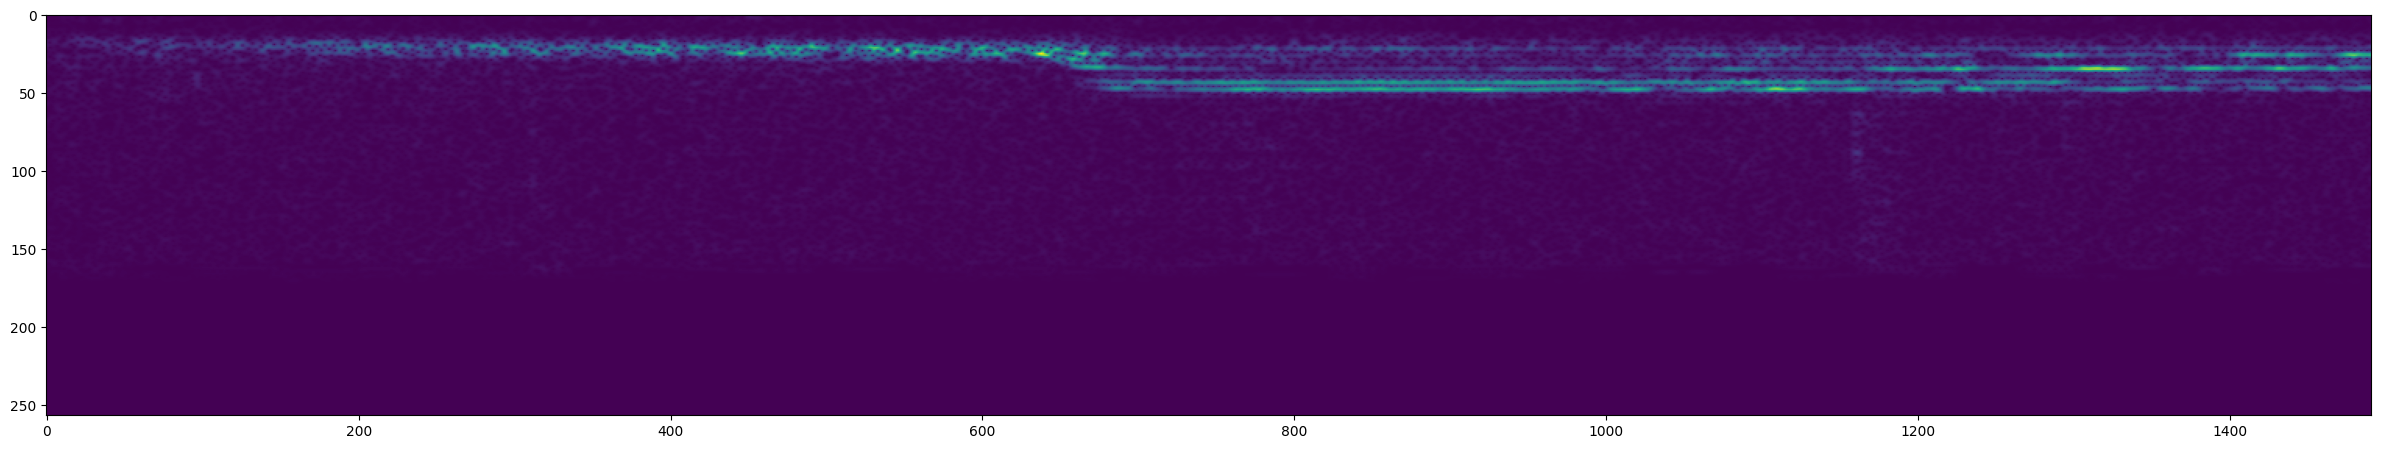

In [31]:
plt.figure(figsize=(30,20))
plt.imshow(tf.transpose(spectrogram)[0])
plt.show()

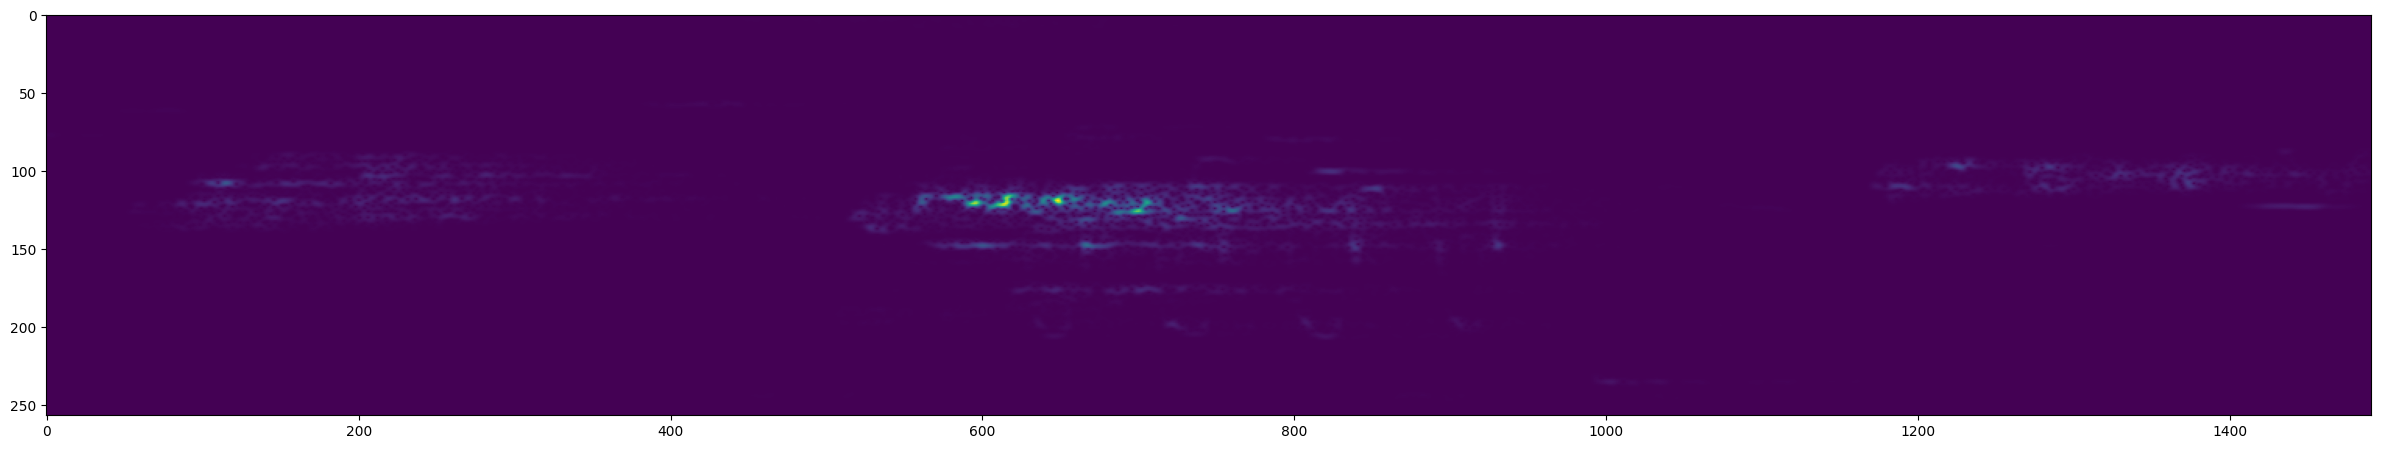

In [32]:
filepath, label = negatives.shuffle(buffer_size=10000).as_numpy_iterator().next()
spectrogram, label = preprocess(filepath, label)
plt.figure(figsize=(30,20))
plt.imshow(tf.transpose(spectrogram)[0])
plt.show()

# *6. Create training and testing partitions*

### *6.1 Create a tensorflow data pipeline*

In [33]:
data = data.map(preprocess)
data = data.cache()
data = data.shuffle(buffer_size=1000)
data = data.batch(2)
data = data.prefetch(8)

### *6.2 Split into training and testing partitions*

In [34]:
len(data)*.7

283.5

In [35]:
train = data.take(36)
test = data.skip(36).take(15)

# *7. Build deep learning model*

### *7.1 Load tensorflow dependencies*

In [36]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Flatten

### *7.2 Build sequential model, compile and view summary*




In [37]:
strategy = tf.distribute.MirroredStrategy()
with strategy.scope():
    model = tf.keras.Sequential([
        tf.keras.layers.Conv2D(8, (3,3), activation='relu', input_shape=(1491, 257, 1)),
        tf.keras.layers.Conv2D(8, (3,3), activation='relu'),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    optimizer = tf.keras.optimizers.Adam()
    loss = tf.keras.losses.BinaryCrossentropy()
    metrics = [tf.keras.metrics.Recall(), tf.keras.metrics.Precision()]
    model.compile(optimizer=optimizer, loss=loss, metrics=metrics)
    model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 1489, 255, 8)      80        
                                                                 
 conv2d_1 (Conv2D)           (None, 1487, 253, 8)      584       
                                                                 
 flatten (Flatten)           (None, 3009688)           0         
                                                                 
 dense (Dense)               (None, 64)                192620096 
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 192620825 (734.79 MB)
Trainable params: 192620825 (734.79 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### *7.3 Fit model, view loss and KPI plots*

In [70]:
history = model.fit(train, epochs=4, validation_data=test)

Epoch 1/4
36/36 [==============================] - 2s 61ms/step - loss: 0.0383 - recall: 1.0000 - precision: 1.0000 - val_loss: 0.1520 - val_recall: 1.0000 - val_precision: 0.9167
Epoch 2/4
36/36 [==============================] - 2s 63ms/step - loss: 1.3090 - recall: 1.0000 - precision: 0.8824 - val_loss: 0.0353 - val_recall: 1.0000 - val_precision: 1.0000
Epoch 3/4
36/36 [==============================] - 3s 70ms/step - loss: 0.0634 - recall: 1.0000 - precision: 0.9286 - val_loss: 0.0177 - val_recall: 1.0000 - val_precision: 1.0000
Epoch 4/4
36/36 [==============================] - 2s 61ms/step - loss: 0.0385 - recall: 1.0000 - precision: 1.0000 - val_loss: 0.0167 - val_recall: 1.0000 - val_precision: 1.0000


In [71]:
history.history

{'loss': [0.03825083747506142,
  1.3090234994888306,
  0.06335356831550598,
  0.0385429710149765],
 'recall': [1.0, 1.0, 1.0, 1.0],
 'precision': [1.0, 0.8823529481887817, 0.9285714030265808, 1.0],
 'val_loss': [0.15204674005508423,
  0.03534521535038948,
  0.01770878955721855,
  0.016658006235957146],
 'val_recall': [1.0, 1.0, 1.0, 1.0],
 'val_precision': [0.9166666865348816, 1.0, 1.0, 1.0]}

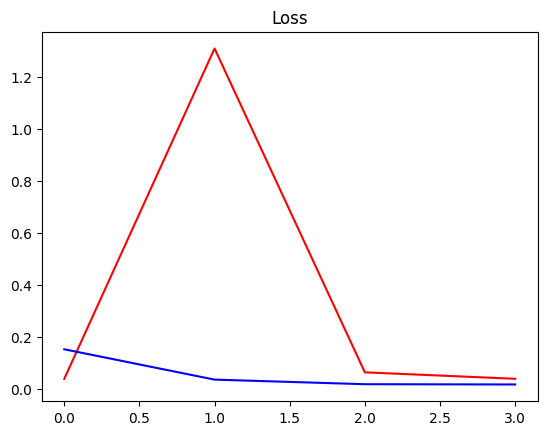

In [72]:
plt.title('Loss')
plt.plot(history.history['loss'], 'r')
plt.plot(history.history['val_loss'], 'b')
plt.show()

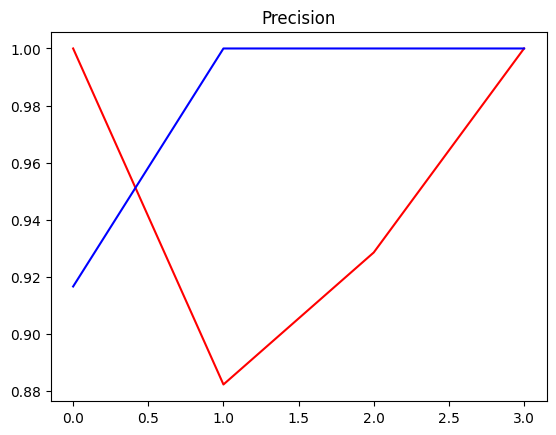

In [73]:
plt.title('Precision')
plt.plot(history.history['precision'], 'r')
plt.plot(history.history['val_precision'], 'b')
plt.show()

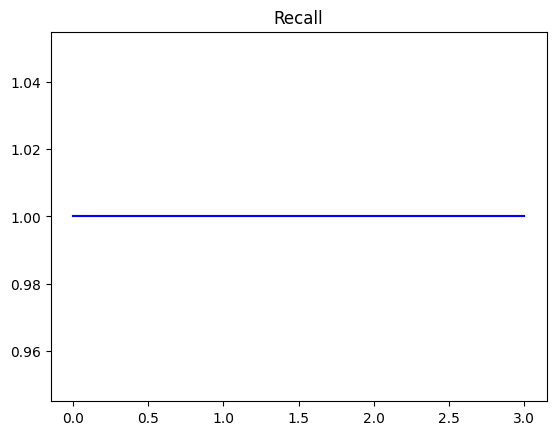

In [74]:
plt.title('Recall')
plt.plot(history.history['recall'], 'r')
plt.plot(history.history['val_recall'], 'b')
plt.show()

# *8. Make a prediction on a signale clip*

### *8.1 Get one batch and make a prediction*

In [75]:
X_test, y_test = test.as_numpy_iterator().next()

In [76]:
X_test.shape

(2, 1491, 257, 1)

In [77]:
y_test.shape

(2,)

In [78]:
yhat = model.predict(X_test)

1/1 [==============================] - 0s 68ms/step


In [79]:
yhat

array([[5.3130558e-09],
       [1.0000000e+00]], dtype=float32)

### *8.2 Convert logits to classes*

In [80]:
yhat = [1 if prediction > 0.5 else 0 for prediction in yhat]

In [81]:
yhat

[0, 1]

In [82]:
y_test.astype(int)

array([0, 1])

In [83]:
tf.math.reduce_sum(yhat)

<tf.Tensor: shape=(), dtype=int32, numpy=1>

In [84]:
tf.math.reduce_sum(y_test)

<tf.Tensor: shape=(), dtype=float32, numpy=1.0>

# *9. Build forest parsing functions*

### *9.1 Load up MP3s*

In [85]:
def load_mp3_16k_mono(filename):
  """Load a WAV file, convert it to a float tensor, resample to 16 kHz single-channel audio."""
  res = tfio.audio.AudioIOTensor(filename)
  # Convert to tensor and combine channels
  tensor = res.to_tensor()
  tensor = tf.math.reduce_sum(tensor, axis=1) / 2
  # Extract sample rate and cast
  sample_rate = res.rate
  sample_rate = tf.cast(sample_rate, dtype=tf.int64)
  # Resample to 16 kHz
  wav = tfio.audio.resample(tensor, rate_in=sample_rate, rate_out=16000)
  return wav

In [86]:
mp3 = os.path.join('data', '/content/Forest Recordings', '/content/Forest Recordings/recording_20.mp3')

In [87]:
wav = load_mp3_16k_mono(mp3)

In [88]:
audio_slices = tf.keras.utils.timeseries_dataset_from_array(wav, wav, sequence_length=48000, sequence_stride=48000, batch_size=1)

In [90]:
samples, index = audio_slices.as_numpy_iterator().next()
samples.shape

(1, 48000)

### *9.2 Build function to convert clips into windowed spectrograms*

In [91]:
def preprocess_mp3(sample, index):
  samples = sample[0]
  zero_padding = tf.zeros([48000] - tf.shape(sample), dtype=tf.float32)
  wav = tf.concat([zero_padding, sample], 0)
  spectrogram = tf.signal.stft(wav, frame_length=320, frame_step=32)
  spectrogram = tf.abs(spectrogram)
  spectrogram = tf.expand_dims(spectrogram, axis=2)
  return spectrogram

### *9.3 Convert longer clips into windows and make predictions*

In [92]:
audio_slices = tf.keras.utils.timeseries_dataset_from_array(wav, wav, sequence_length=16000, sequence_stride=16000, batch_size=1)
audio_slices = audio_slices.map(preprocess_mp3)
audio_slices = audio_slices.batch(64)